# PROJECT TITLE: THE SE HIGHER EDUCATION BRAIN DRAIN

## SETUP

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### IMPORT MAIN DATA SET -- STUDENT ENROLMENTS IN HIGHER EDUCATION 

In [2]:
raw_material= pd.read_csv(
   r'\Users\rhayes\Desktop\UCD_Data_Analytics_Course\HEA_Student_Enrolment_Data_Domiciliary_FT_Only_201819.csv'
)
raw_material.head()

,Number of Students,Academic Year,Dom Ireland GB,Mode Desc,Isced Discipline,Institute New Combined,County
0,2,2018/2019,(Other) EU,Full-time,(0114) Teacher training with subject specializ...,"National University of Ireland, Galway",NaN
1,18,2018/2019,(Other) EU,Full-time,(0210) Arts not further defined or elsewhere c...,"National University of Ireland, Galway",NaN
2,1,2018/2019,(Other) EU,Full-time,(0211) Audio-visual techniques and media produ...,"National University of Ireland, Galway",NaN
3,1,2018/2019,(Other) EU,Full-time,"(0212) Fashion, interior and industrial design",Galway-Mayo IT,NaN
4,1,2018/2019,(Other) EU,Full-time,(0220) Humanities (except languages) not furth...,"National University of Ireland, Galway",NaN


In [3]:
# Clean the data 


## SECTION 1: 
## THE PROFILE OF HIGHER EDUCATION ENROLMENT IN IRELAND

## 1.1 What Colleges Have the Most Students? 

In [4]:
student_population_colleges = raw_material.groupby ( ["Institute New Combined"]) ["Number of Students"].agg(sum) 
student_population_colleges=student_population_colleges.reset_index()
student_population_colleges = student_population_colleges.sort_values("Number of Students", ascending=False)

In [5]:
# List the colleges by rank order, largest to smallest, and rename one of the columns 
student_population_colleges ["Rank"] = (np.arange(len (student_population_colleges)))+1
student_population_colleges=student_population_colleges.set_index ("Rank")
student_population_colleges=student_population_colleges.rename (columns={"Institute New Combined":"College"})

In [6]:
#Final list of colleges
student_population_colleges

,College,Number of Students
Rank,,
1,University College Dublin,22792
2,Technological University Dublin,18862
3,University College Cork,17721
4,Trinity College Dublin,15543
5,"National University of Ireland, Galway",15420
6,Dublin City University,13635
7,University of Limerick,13053
8,Maynooth University,10818
9,Cork IT,8326


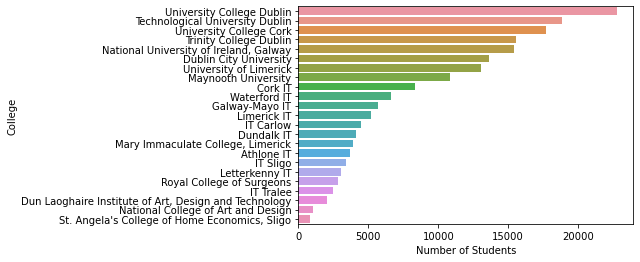

In [7]:
#Create graphic representation 
sns.barplot(data=student_population_colleges, y="College", x="Number of Students");

In [9]:
# It would also be interesting to get the overall percentage of the total number recruited by each institution 
student_population_colleges ["Percent of Overall"] = student_population_colleges ["Number of Students"]/student_population_colleges ["Number of Students"].sum()
student_population_colleges=student_population_colleges.round(decimals=4) 

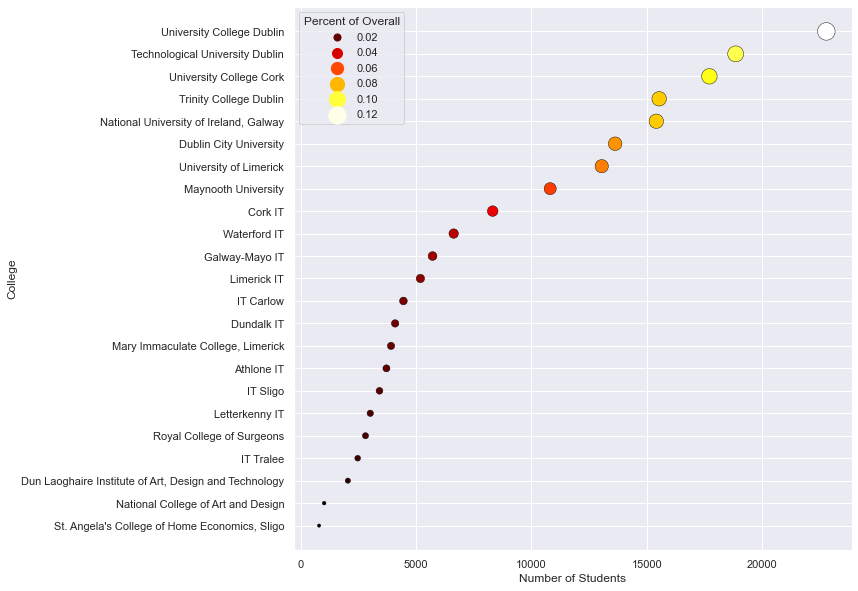

In [10]:
#This presented in graphic form
sns.set_style("ticks")
sns.set(rc={"figure.figsize":(10, 10)})
minsize=min(student_population_colleges["Percent of Overall"]*2500)
maxsize=max(student_population_colleges["Percent of Overall"]*2500)
sns.scatterplot(data=student_population_colleges
                , x="Number of Students", y="College"
                , edgecolor = "black"
                , palette="hot"
                , size="Percent of Overall"
                , sizes=(minsize, maxsize)
                , hue="Percent of Overall"
                );

In [11]:
# Final list for printing
student_population_colleges=student_population_colleges.round(decimals=2)    
student_population_colleges

,College,Number of Students,Percent of Overall
Rank,,,
1,University College Dublin,22792,0.12
2,Technological University Dublin,18862,0.10
3,University College Cork,17721,0.10
4,Trinity College Dublin,15543,0.08
5,"National University of Ireland, Galway",15420,0.08
6,Dublin City University,13635,0.07
7,University of Limerick,13053,0.07
8,Maynooth University,10818,0.06
9,Cork IT,8326,0.04


## 1.2 What it the Most Popular Discipline for Students? 

In [60]:
student_population_course = raw_material.groupby ( ["Isced Discipline"]) ["Number of Students"].agg(sum) 
student_population_course= student_population_course.reset_index()
student_population_course.head()

,Isced Discipline,Number of Students
0,(0011) Basic programmes and qualifications,724
1,(0021) Literacy and numeracy,187
2,(0031) Personal skills and development,151
3,(0110) Education not further defined or elsewh...,895
4,(0111) Education science,801


In [61]:
student_population_course =student_population_course.sort_values("Number of Students", ascending=False)
student_population_course ["Rank"] = (np.arange(len (student_population_course)))+1
student_population_course=student_population_course.set_index ("Rank")
student_population_course=student_population_course.rename (columns={"Isced Discipline":"Course Area (Isced)"})
# Output top 20 course areas
student_population_course [0:20] 

,Course Area (Isced),Number of Students
Rank,,
1,(0410) Business and administration not further...,14719
2,(0210) Arts not further defined or elsewhere c...,11722
3,(0913) Nursing and midwifery,8030
4,(0912) Medicine,8011
5,(0413) Management and administration,7468
6,(0421) Law,5770
7,(0610) Information and Communication Technolog...,5495
8,(0510) Biological and related sciences not fur...,5188
9,(0613) Software and applications development a...,4581


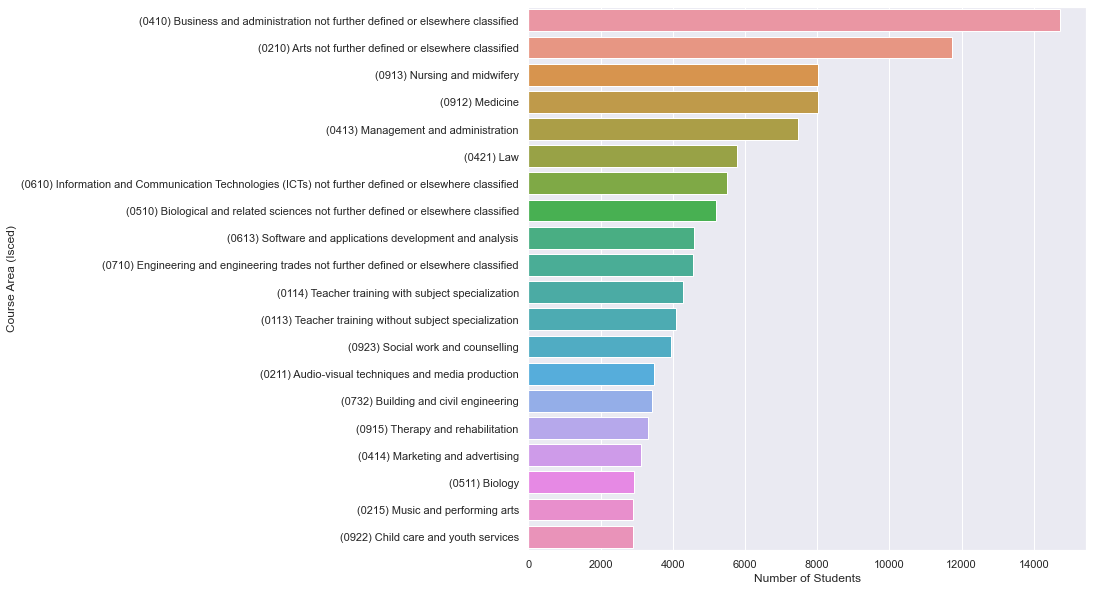

In [62]:
# Represent top 20 in graphic form
sns.barplot(data=student_population_course[0:20], y="Course Area (Isced)", x="Number of Students");

In [113]:
# Again it would be interesting to know what percentage of the overall each of these occupies
student_population_course ["Percent of Overall"] = student_population_course ["Number of Students"]/student_population_course ["Number of Students"].sum()
student_population_course=student_population_course.round(decimals=5) 
student_population_course [0:20]

,Course Area (Isced),Number of Students,Percent of Overall
Rank,,,
1,(0410) Business and administration not further...,14719,0.07936
2,(0210) Arts not further defined or elsewhere c...,11722,0.06320
3,(0913) Nursing and midwifery,8030,0.04329
4,(0912) Medicine,8011,0.04319
5,(0413) Management and administration,7468,0.04026
6,(0421) Law,5770,0.03111
7,(0610) Information and Communication Technolog...,5495,0.02963
8,(0510) Biological and related sciences not fur...,5188,0.02797
9,(0613) Software and applications development a...,4581,0.02470


In [114]:
# Create chart here maybe? 

# Shuffle the rows for the purposes of the graphic
student_population_course_shuffled=student_population_course[0:20].sample(frac=1) 


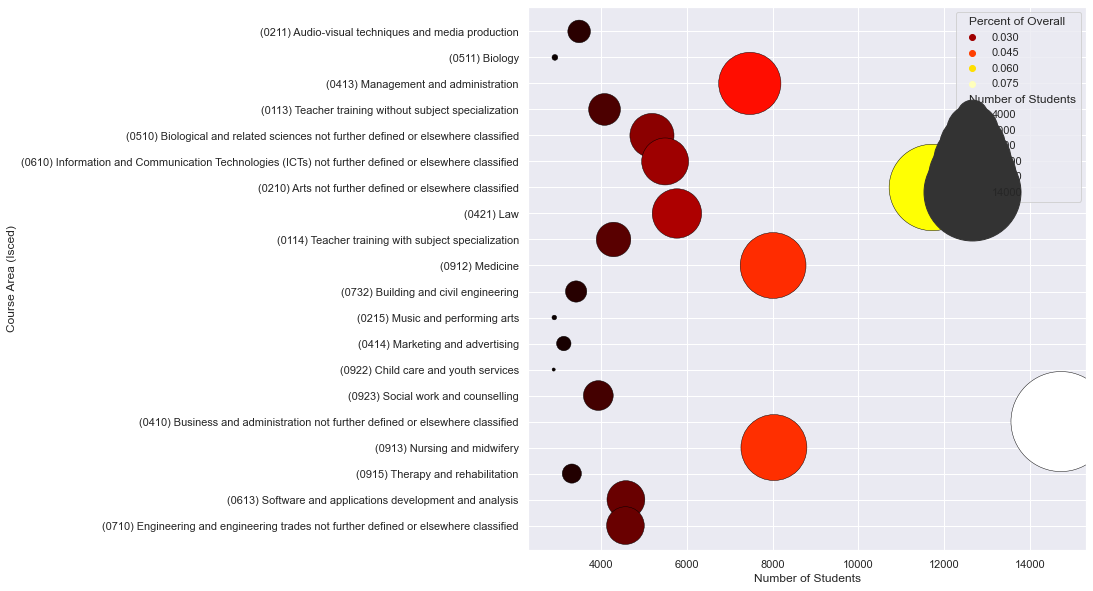

In [122]:
sns.scatterplot(data=student_population_course_shuffled
                , x="Number of Students"
                , y="Course Area (Isced)"
                , edgecolor = "black"
                , palette="hot"
                , size="Number of Students"
                , sizes=(10,10000)#(minsize, maxsize)
                , hue="Percent of Overall"
                );

### 1.3 What County Sends the Most Students to College? 

In [18]:
student_population_county = raw_material.groupby ("County") ["Number of Students"].agg(sum)
student_population_county = pd.DataFrame(student_population_county)
student_population_county=student_population_county.reset_index()

In [19]:
student_population_county

,County,Number of Students
0,Antrim (including Belfast),281
1,Armagh,77
2,Carlow,2110
3,Cavan,2422
4,Clare,4741
5,Cork,19892
6,Derry,131
7,Donegal,5319
8,Down,309
9,Dublin (including postal districts),37638


In [20]:
# Sort out Dublin and Antrim
student_population_county = student_population_county.replace(student_population_county ["County"] [9], "Dublin")
student_population_county

,County,Number of Students
0,Antrim (including Belfast),281
1,Armagh,77
2,Carlow,2110
3,Cavan,2422
4,Clare,4741
5,Cork,19892
6,Derry,131
7,Donegal,5319
8,Down,309
9,Dublin,37638


In [21]:
student_population_county = student_population_county.replace(student_population_county ["County"] [0], "Antrim")
student_population_county

,County,Number of Students
0,Antrim,281
1,Armagh,77
2,Carlow,2110
3,Cavan,2422
4,Clare,4741
5,Cork,19892
6,Derry,131
7,Donegal,5319
8,Down,309
9,Dublin,37638


In [22]:
# Sort and show graphic

In [23]:
student_population_county = student_population_county.sort_values("Number of Students", ascending=False)

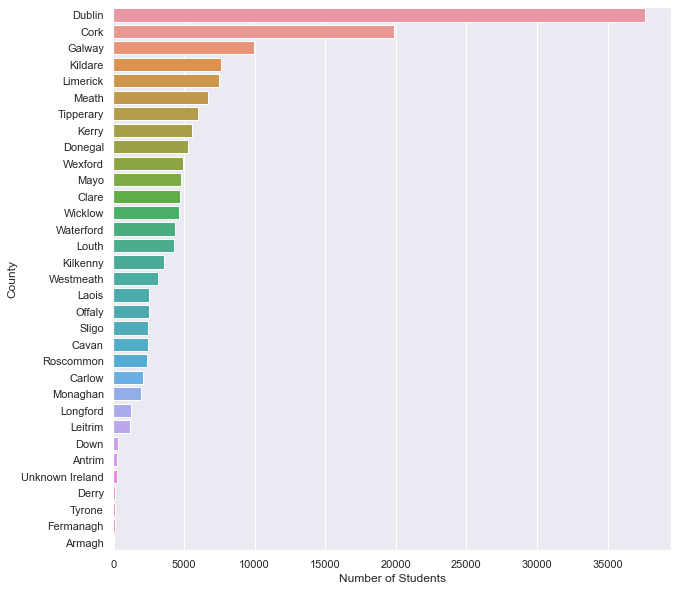

In [24]:
sns.barplot(data=student_population_county, y="County", x="Number of Students");

In [25]:
student_population_county

,County,Number of Students
9,Dublin,37638
5,Cork,19892
11,Galway,9938
13,Kildare,7629
17,Limerick,7461
21,Meath,6681
26,Tipperary,5994
12,Kerry,5541
7,Donegal,5319
31,Wexford,4904


In [26]:
# Unsurprisingly, the county sending most students to higher college is Dublin, followed by the Cork and Galway. 
# A more meaningful measure of relative participation would be the proportion of the overall population 
# attending higher education. See Section 2 below

### 1.2.1 Import and Clean Data on County Populations 

#### Scrape data 

In [27]:
scraped_data=pd.read_html("https://citypopulation.de/en/ireland/towns/")

In [28]:
print(len(scraped_data))

2


In [29]:
County_Populations=scraped_data[0]

In [30]:
County_Populations.head()

,Name,Status,PopulationCensus1991-04-21,PopulationCensus1996-04-28,PopulationCensus2002-04-28,PopulationCensus2006-04-23,PopulationCensus2011-04-10,PopulationCensus2016-04-24,Unnamed: 8
0,Carlow,County,40942,41616,46014,50349,54612,56932,→
1,Cavan,County,52796,52944,56546,64003,73183,76176,→
2,Clare,County,90918,94006,103277,110950,117196,118817,→
3,Cork,County,...,...,...,...,319494,333213,→
4,Cork City,City,...,...,...,...,199538,209655,→


#### Only include most recent census information (2016)

In [31]:
County_Populations2016=County_Populations.drop(
    ["PopulationCensus1991-04-21", "PopulationCensus1996-04-28", "PopulationCensus2002-04-28", "PopulationCensus2006-04-23", "PopulationCensus2011-04-10", "Unnamed: 8"],
    axis=1)

In [32]:
County_Populations2016

,Name,Status,PopulationCensus2016-04-24
0,Carlow,County,56932
1,Cavan,County,76176
2,Clare,County,118817
3,Cork,County,333213
4,Cork City,City,209655
5,Donegal,County,159192
6,Dublin City,City,554554
7,Dún Laoghaire-Rathdown,County,218018
8,Fingal,County,296020
9,Galway,County,179390


#### Tidy up Dublin, Cork and Galway populations 

In [33]:
def TidyCountyPop(County_Populations2016): 
    if County_Populations2016 ["Name"] in ["Fingal", "Dublin City", "Dún Laoghaire-Rathdown", "South Dublin"]:
        return "Dublin"
    elif County_Populations2016 ["Name"] in ["Cork City"]:
        return "Cork"
    elif County_Populations2016 ["Name"] in ["Galway City"]:
        return "Galway"
    elif County_Populations2016 ["Name"] in ["Laois (Laoighis)"]:
        return "Laois"
    else:
        return County_Populations2016 ["Name"]


In [34]:
County_Populations2016["New Name"]=County_Populations2016.apply (TidyCountyPop, axis=1)
County_Populations2016

,Name,Status,PopulationCensus2016-04-24,New Name
0,Carlow,County,56932,Carlow
1,Cavan,County,76176,Cavan
2,Clare,County,118817,Clare
3,Cork,County,333213,Cork
4,Cork City,City,209655,Cork
5,Donegal,County,159192,Donegal
6,Dublin City,City,554554,Dublin
7,Dún Laoghaire-Rathdown,County,218018,Dublin
8,Fingal,County,296020,Dublin
9,Galway,County,179390,Galway


In [35]:
County_Populations2016 = County_Populations2016.sort_values("New Name")

In [36]:
County_Populations2016

,Name,Status,PopulationCensus2016-04-24,New Name
0,Carlow,County,56932,Carlow
1,Cavan,County,76176,Cavan
2,Clare,County,118817,Clare
3,Cork,County,333213,Cork
4,Cork City,City,209655,Cork
5,Donegal,County,159192,Donegal
6,Dublin City,City,554554,Dublin
7,Dún Laoghaire-Rathdown,County,218018,Dublin
8,Fingal,County,296020,Dublin
25,South Dublin,County,278767,Dublin


In [37]:
County_Populations2016=County_Populations2016.groupby("New Name").sum(["Dublin", "Cork", "Galway"]).reset_index()

In [38]:
# Final Tidy Up
County_Populations2016.columns=["County", "Population_2016"]
County_Populations2016 = County_Populations2016.sort_values("Population_2016", ascending=False)
County_Populations2016 = County_Populations2016.drop(7)

In [39]:
 County_Populations2016# Final table of county populations 2016 in order of size

,County,Population_2016
5,Dublin,1347359
3,Cork,542868
6,Galway,258058
9,Kildare,222504
17,Meath,195044
13,Limerick,194899
22,Tipperary,159553
4,Donegal,159192
25,Wexford,149722
8,Kerry,147707


### Merge County and Student Population Information to get a Patricipation Rate 

In [40]:
merged_population_counties = student_population_county.merge (County_Populations2016, on="County", how="right")

In [41]:
merged_population_counties 

,County,Number of Students,Population_2016
0,Dublin,37638,1347359
1,Cork,19892,542868
2,Galway,9938,258058
3,Kildare,7629,222504
4,Meath,6681,195044
5,Limerick,7461,194899
6,Tipperary,5994,159553
7,Donegal,5319,159192
8,Wexford,4904,149722
9,Kerry,5541,147707


In [42]:
merged_population_counties ["Students Per 1000"] = merged_population_counties ["Number of Students"]/merged_population_counties ["Population_2016"]*1000

In [43]:
merged_population_counties=merged_population_counties.round(decimals=2)

In [44]:
mean_counties=merged_population_counties["Students Per 1000"].mean()

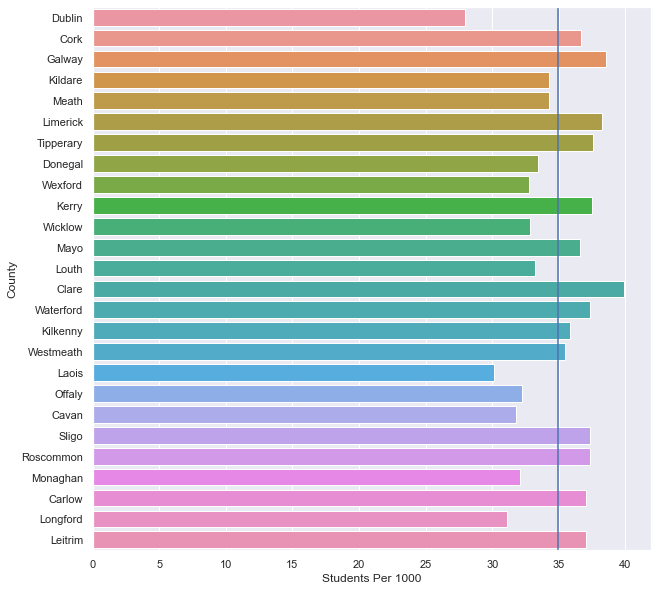

In [45]:
graph=sns.barplot(
    data=merged_population_counties, 
    y="County", 
    x="Students Per 1000",
      );
graph.axvline(mean_counties)
plt.show;

In [46]:
participation_by_county=merged_population_counties.pivot_table(values="Students Per 1000", index="County")
participation_by_county.sort_values("Students Per 1000", ascending=False)

,Students Per 1000
County,
Clare,39.90
Galway,38.51
Limerick,38.28
Tipperary,37.57
Kerry,37.51
Sligo,37.35
Waterford,37.32
Roscommon,37.31
Leitrim,37.07


In [47]:
# These results are somewhat interesting. They show that in Clare, 40 out of every 1000 people are full-time students, 
# while in Dublin it's 28 out of every 100. Not surprising. 

## SECTION 2: 
## WHAT AND WHERE DO STUDENTS FROM THE SOUTH EAST GO TO COLLEGE? 
    

### 2.1 Slice raw material table to generate table only of students from the counties of the South East 

In [48]:
SE_counties=["Carlow", "Kilkenny", "Waterford", "Wexford"]

In [49]:
SE_counties_enrolment=raw_material [raw_material["County"].isin(SE_counties)]

In [50]:
SE_counties_enrolment.head()

,Number of Students,Academic Year,Dom Ireland GB,Mode Desc,Isced Discipline,Institute New Combined,County
2359,2,2018/2019,Ireland,Full-time,(0011) Basic programmes and qualifications,Trinity College Dublin,Carlow
2360,1,2018/2019,Ireland,Full-time,(0110) Education not further defined or elsewh...,University of Limerick,Carlow
2361,3,2018/2019,Ireland,Full-time,(0110) Education not further defined or elsewh...,Waterford IT,Carlow
2362,8,2018/2019,Ireland,Full-time,(0111) Education science,Dublin City University,Carlow
2363,9,2018/2019,Ireland,Full-time,(0111) Education science,IT Carlow,Carlow


#### Show a table with the totals for each county in the region and the total enrolment 

In [51]:
SE_overall_enrol = SE_counties_enrolment.groupby ("County") ["Number of Students"].sum() 
SE_overall_enrol.loc["Total"] = SE_overall_enrol.sum()
SE_overall_enrol=SE_overall_enrol.reset_index()
SE_overall_enrol

,County,Number of Students
0,Carlow,2110
1,Kilkenny,3557
2,Waterford,4336
3,Wexford,4904
4,Total,14907


In [52]:
TotalSE=SE_overall_enrol.iloc [4,1]
TotalOverall=student_population_colleges ["Number of Students"].sum()
SE_as_overall_percent=TotalSE/TotalOverall
print(TotalSE)
print(TotalOverall)
print( SE_as_overall_percent.round(decimals=3))

14907
185474
0.08


#### Show a table with the most popular colleges for students from the SE 

In [53]:
SE_popular_colleges=SE_counties_enrolment.groupby ("Institute New Combined") ["Number of Students"].sum()
SE_popular_colleges=SE_popular_colleges.sort_values(ascending=False).reset_index()
# Add column for Rank
SE_popular_colleges["Rank"] = (np.arange(len (SE_popular_colleges)))+1
SE_popular_colleges=SE_popular_colleges.set_index ("Rank")
# Add column to reflect % of overall total 
SE_popular_colleges ["Percent of Total SE"] = (SE_popular_colleges ["Number of Students"]/SE_popular_colleges ["Number of Students"].sum()).round(decimals=3)*100
SE_popular_colleges

,Institute New Combined,Number of Students,Percent of Total SE
Rank,,,
1,Waterford IT,3836,25.7
2,IT Carlow,1686,11.3
3,University College Dublin,1606,10.8
4,University College Cork,1389,9.3
5,Dublin City University,1150,7.7
6,University of Limerick,1020,6.8
7,Maynooth University,936,6.3
8,Trinity College Dublin,699,4.7
9,Technological University Dublin,552,3.7


#### Show a table with the most popular courses for students from the SE

In [54]:
SE_popular_courses=SE_counties_enrolment.groupby ("Isced Discipline") ["Number of Students"].sum()
SE_popular_courses=SE_popular_courses.sort_values(ascending=False).reset_index()
# Add column for Rank
SE_popular_courses["Rank"] = (np.arange(len (SE_popular_courses)))+1
SE_popular_courses=SE_popular_courses.set_index ("Rank")
SE_popular_courses [0:20]

,Isced Discipline,Number of Students
Rank,,
1,(0413) Management and administration,1106
2,(0210) Arts not further defined or elsewhere c...,842
3,(0410) Business and administration not further...,806
4,(0913) Nursing and midwifery,709
5,(0421) Law,502
6,(0113) Teacher training without subject specia...,500
7,(0610) Information and Communication Technolog...,453
8,(0114) Teacher training with subject specializ...,446
9,(0923) Social work and counselling,439


#### How many students from the SE region study in the SE region 

In [55]:
# Define SE colleges
SE_colleges=["Waterford IT", "IT Carlow"]

In [56]:
SE_studying_in_SE=SE_counties_enrolment [SE_counties_enrolment ["Institute New Combined"].isin(SE_colleges)]
SE_total_studying_in_SE=SE_studying_in_SE ["Number of Students"].sum()
SE_not_studying_in_SE=SE_counties_enrolment [~SE_counties_enrolment ["Institute New Combined"].isin(SE_colleges)]
SE_total_not_studying_in_SE=SE_not_studying_in_SE ["Number of Students"].sum()

#### Create Some Comparators: the South West, and the Mid West

In [57]:
# The South West TO HERE ... 
SW_counties = ["Kerry", "Cork"] # NUTS3 South West Region of Ireland 
SW_overall_enroll = raw_material [raw_material["County"].isin(SW_counties)]
SW_total=SW_counties_total.groupby("County") ["Number of Students"].sum()
SW_total.loc["Total"] = SW_total.sum()
SW_total=SW_total.reset_index()
SW_total

NameError: name 'SW_counties_total' is not defined

In [ ]:
TotalSW=SE_overall_enrol.iloc [4,1]
TotalOverall=student_population_colleges ["Number of Students"].sum()
SE_as_overall_percent=TotalSE/TotalOverall
print(TotalSE)
print(TotalOverall)
print( SE_as_overall_percent.round(decimals=3))

In [ ]:
MW_counties_total = raw_material [raw_material["County"].isin(MW_counties)]
SW_counties_total = raw_material [raw_material["County"].isin(SW_counties)]
SW_total=SW_counties_total.groupby("County") ["Number of Students"].sum()
MW_total=MW_counties_total.groupby("County") ["Number of Students"].sum()
MW_total
SW_total

In [ ]:
SW_total=SW_counties_enrolment ["Number of Students"].sum()
MW_total=MW_counties_enrolment ["Number of Students"].sum()
SE_total=SE_counties_enrolment ["Number of Students"].sum()

In [ ]:
MW_counties = ["Clare", "Tipperary", "Limerick"] # NUTS3 Mid West Region of Ireland 
MW_counties_total = raw_material [raw_material["County"].isin(MW_counties)]
SW_counties_total = raw_material [raw_material["County"].isin(SW_counties)]
SW_total=SW_counties_total.groupby("County") ["Number of Students"].sum()
MW_total=MW_counties_total.groupby("County") ["Number of Students"].sum()
MW_total
SW_total

In [ ]:
Comparator_data ={"Region": ["South West", "Mid West", "South East"], "Enrolment": [SW_total,  MW_total, SE_total]}
pd.DataFrame(Comparator_data)

#### Add in percentage of overall national enrolment 

In [ ]:
Comparator_data ["Percent Overall National"]=Comparator_data ["Enrolment"]/(raw_material ["Number of Students"].sum())

In [ ]:
Comparator_data=pd.DataFrame(Comparator_data)

In [ ]:
print(Comparator_data.set_index("Region"))

In [ ]:
Comparator_data.plot(x="Region", y="Percent Overall National", kind="bar", color="orange")

#### Calculate regional population as % of overall national population 

In [ ]:
MW_counties_population = County_Populations2016 [County_Populations2016 ["New Name"].isin(MW_counties)]
SW_counties_population = County_Populations2016 [County_Populations2016 ["New Name"].isin(SW_counties)]
SE_counties_population = County_Populations2016 [County_Populations2016 ["New Name"].isin(SE_counties)]

In [ ]:
Comparator_data ["Population Census 2016"] = ([
    SW_counties_population ["PopulationCensus2016-04-24"].sum(), 
    MW_counties_population ["PopulationCensus2016-04-24"].sum(), 
    SE_counties_population ["PopulationCensus2016-04-24"].sum()
])
Comparator_data

In [ ]:
Comparator_data ["Percent National Population"] = Comparator_data ["Population Census 2016"]/County_Populations2016 ["PopulationCensus2016-04-24"].sum()
Comparator_data

In [ ]:
# Interesting. SW has 7% of national population but 14% of her students. 
# SE has 4% national population and 8% of her students.

In [ ]:
SE_students_discipline = SE_counties_enrolment.groupby("Isced Discipline") ["Number of Students"].sum()
SE_students_discipline = SE_students_discipline.sort_values(ascending=False)
SE_students_discipline

In [ ]:
SE_student_population=isolateSE2.groupby ("County").sum().reset_index()

In [ ]:
raw_material_ind=raw_material.set_index ("County")

In [ ]:
isolateSE1=raw_material_ind.loc[ ["Waterford", "Wexford", "Carlow", "Kilkenny"]]

In [ ]:
isolateSE2=isolateSE1.sort_values("Institute New Combined")

In [ ]:
isolateSE2.head()

In [ ]:
print(SE_student_population) #This is the number of students from each County in the SE attending Higher Education 

In [ ]:
raw_material_ind.sort_index()

In [ ]:
raw_material_ind.sort_index(level=["County", "Number of Students"])

In [ ]:
WD_student.head()

In [ ]:
WD_student2=WD_student.groupby (["Institute New Combined"]) ["Number of Students"]. sum()
WD_student2.plot (kind="bar", rot=90)
plt.show()

In [ ]:
WD_student3=WD_student.sort_values("Institute New Combined")
WD_student_excludeWIT=WD_student3[~WD_student3 ["Institute New Combined"].isin("Waterford IT")]


In [ ]:
raw_material.head()

In [ ]:
raw_material_ind=raw_material.set_index("County")

In [ ]:
raw_material_ind.head()

In [ ]:
raw_material_ind.isna()

In [ ]:
raw_material_ind.isna().any()

In [ ]:
raw_material.isna().any()

In [ ]:
raw_material_ind.reset_index()

In [ ]:
raw_material_ind.isna().any()

In [ ]:
raw_material_ind.sort_values("Number of Students", ascending=False)

In [ ]:
raw_material_ind.sort_values("County", ascending=True)

raw_material_ind.groupby("Institute New Combined) ["Number of Students"]. sum()

In [ ]:
most_populace_colleges=raw_material_ind.groupby("Institute New Combined") ["Number of Students"].sum()

In [ ]:
most_populace_colleges.head()

In [ ]:
most_populace_colleges.hist()

In [ ]:
most_populace_colleges.plot(x="Institute New Combined", kind="bar", rot=90)

In [ ]:
most_populace_colleges.head()

In [ ]:
SE_colleges = most_populace_colleges ("Institute New Combined" ["Carlow", "Kilkenny"])

In [ ]:
SE_counties_students = (raw_material ["County"]==["Carlow"])